# Travel Insurance Prediction – Komplettes Data Understanding
**Ziel:** Herausfinden, welche Faktoren wirklich beeinflussen, ob jemand eine Reiseversicherung kauft  
Datensatz: `TravelInsurancePrediction.csv` (Kaggle)

In [2]:
# =============================================================================
# 1. Libraries importieren + Warnungen ausblenden
# =============================================================================
import pandas as pd                 # Daten laden, manipulieren, gruppieren
import numpy as np                  # falls wir später numerisch rechnen müssen
import matplotlib.pyplot as plt     # Basis für alle Plots
import seaborn as sns               # macht Boxplots, etc. deutlich schöner
import warnings
warnings.filterwarnings("ignore")   # nervige Deprecation-Warnungen weg

## 2. Daten einlesen & erste Bereinigung
Der CSV hat eine überflüssige erste Spalte (Unnamed: 0 / alter Index) → sofort rauswerfen

In [3]:
# CSV einlesen
df = pd.read_csv("TravelInsurancePrediction.csv")

# Erste Spalte ist nur ein automatisch generierter Index → komplett nutzlos
# df.columns[0] greift dynamisch auf die erste Spalte zu (auch wenn Name anders ist)
df = df.drop(df.columns[0], axis=1)

# Kurz zur Kontrolle: Wie groß ist der Datensatz eigentlich?
df.shape  # → (1987, 9)

(1987, 9)

## 3. Bedeutung der Merkmale (deine ursprüngliche Übersicht – nur schöner formatiert)

| Spalte                | Bedeutung                                          | Datentyp     | Deine Einschätzung der Relevanz              |
|-----------------------|----------------------------------------------------|--------------|-----------------------------------------------|
| Age                   | Alter (alle zwischen 25 und 35)                    | metrisch     | schwach / fast irrelevant                     |
| Employment Type       | Government Sector oder Private Self-employed       | nominal      | **stark relevant**                            |
| GraduateOrNot         | Hochschulabschluss ja/nein                         | nominal      | irrelevant                                    |
| AnnualIncome          | Jahreseinkommen in indischen Rupien               | metrisch     | **wichtigster Prädiktor!**                    |
| FamilyMembers         | Anzahl Familienmitglieder                          | metrisch     | schwach                                       |
| ChronicDiseases       | Chronische Krankheiten vorhanden (0/1)             | binär        | praktisch kein Einfluss                       |
| FrequentFlyer         | Häufig in den letzten Jahren geflogen?             | nominal      | **stark relevant**                            |
| EverTravelledAbroad   | War schon mal im Ausland?                          | nominal      | **extrem stark**                              |
| TravelInsurance       | **Zielvariable** – hat eine Reiseversicherung?    | binär (0/1)  | –                                             |

**Erster Eindruck war goldrichtig:**  
Nur **vier Merkmale** scheinen wirklich wichtig zu sein:  
**AnnualIncome, EverTravelledAbroad, FrequentFlyer, Employment Type**

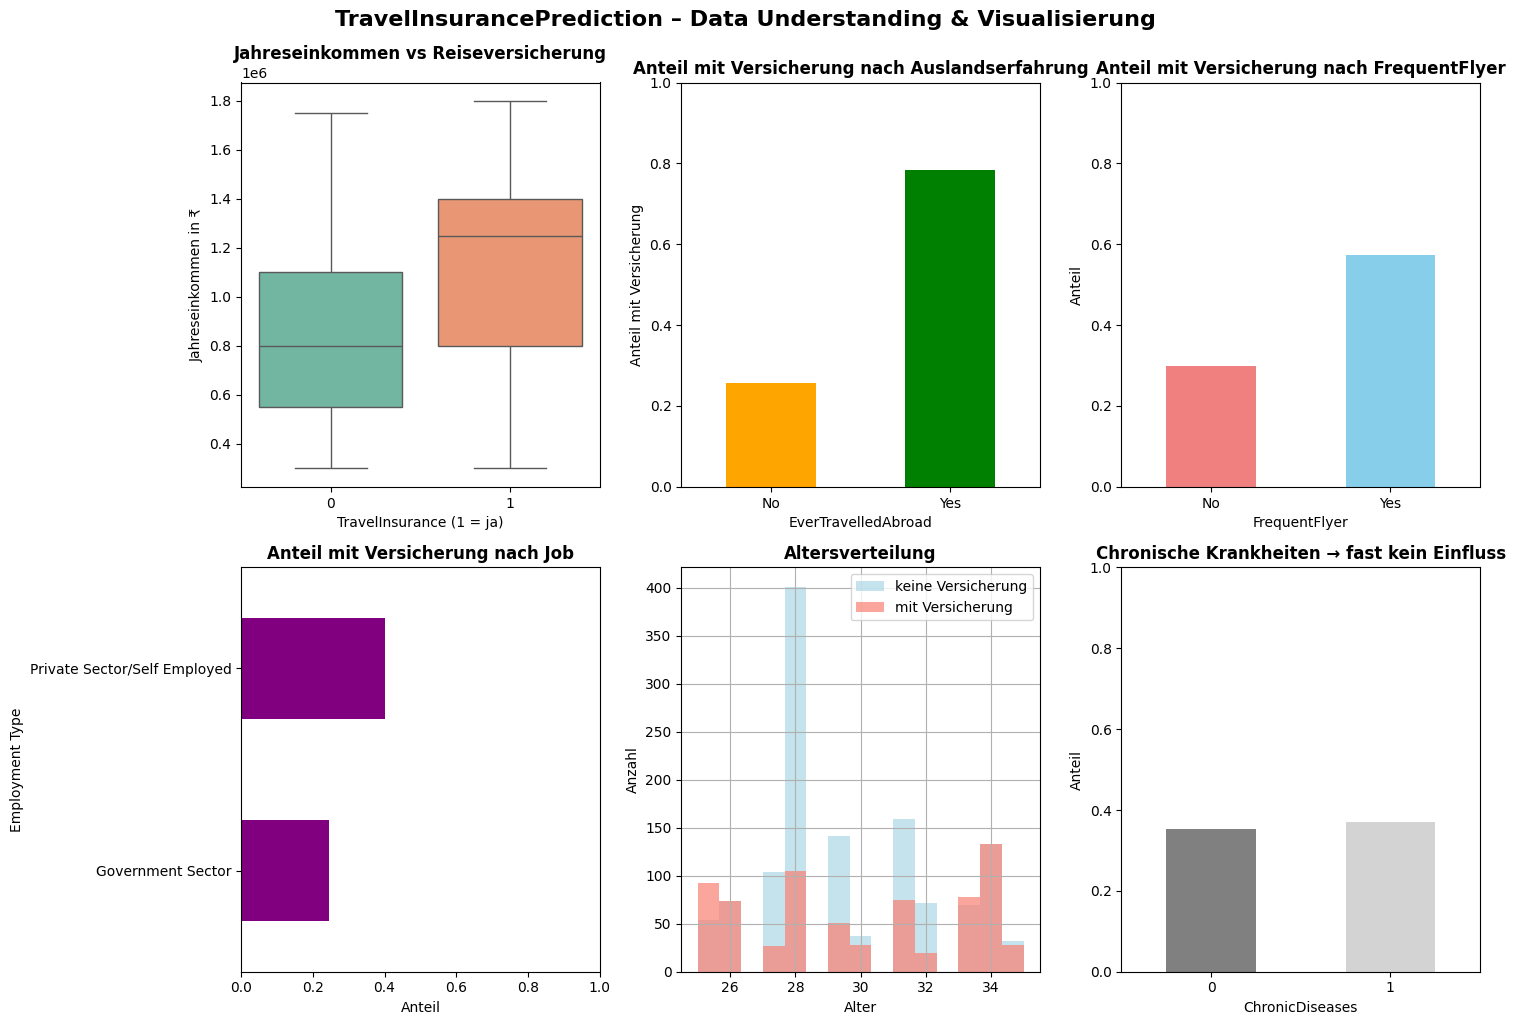

In [4]:
# =============================================================================
# 4. Visualisierung – alles in einer großen 2×3 Übersicht
# =============================================================================
plt.figure(figsize=(15, 10))   # große Figure, damit alles gut lesbar ist

# --------------------------------------------------
# 1. Boxplot: Einkommen vs. Reiseversicherung
# --------------------------------------------------
plt.subplot(2, 3, 1)   # erste Position im 2×3 Grid
sns.boxplot(data=df, 
            x="TravelInsurance",          # x-Achse = Zielvariable (0 oder 1)
            y="AnnualIncome",             # y-Achse = Einkommen
            hue="TravelInsurance",        # Farben nach Zielvariable → bessere Trennung
            palette="Set2",               # schönes, kontrastreiches Farbschema
            legend=False)                 # Legende wäre doppelt → ausblenden
plt.title("Jahreseinkommen vs Reiseversicherung", fontweight="bold")
plt.xlabel("TravelInsurance (1 = ja)")     # klar machen, was 0 und 1 bedeutet
plt.ylabel("Jahreseinkommen in ₹")

# --------------------------------------------------
# 2. Auslandserfahrung → Anteil mit Versicherung
# --------------------------------------------------
plt.subplot(2, 3, 2)
# Gruppieren nach EverTravelledAbroad und Mittelwert von TravelInsurance berechnen
# → bei 0/1-Spalte ist mean() genau der Anteil der 1er
(df.groupby("EverTravelledAbroad")["TravelInsurance"]
   .mean()
   .plot(kind="bar", 
         color=["orange", "green"],   # No = orange, Yes = grün
         ax=plt.gca()))               # ax=plt.gca() → Plot ins aktuelle Subplot einfügen
plt.title("Anteil mit Versicherung nach Auslandserfahrung", fontweight="bold")
plt.ylabel("Anteil mit Versicherung")
plt.ylim(0, 1)                               # einheitliche Skala für Vergleiche
plt.xticks(rotation=0)

# --------------------------------------------------
# 3. FrequentFlyer → Anteil mit Versicherung
# --------------------------------------------------
plt.subplot(2, 3, 3)
(df.groupby("FrequentFlyer")["TravelInsurance"]
   .mean()
   .plot(kind="bar", 
         color=["lightcoral", "skyblue"],
         ax=plt.gca()))
plt.title("Anteil mit Versicherung nach FrequentFlyer", fontweight="bold")
plt.ylabel("Anteil")
plt.ylim(0, 1)
plt.xticks(rotation=0)

# --------------------------------------------------
# 4. Beschäftigungsart (horizontal wegen langen Namen)
# --------------------------------------------------
plt.subplot(2, 3, 4)
(df.groupby("Employment Type")["TravelInsurance"]
   .mean()
   .plot(kind="barh",                  # barh = horizontal bars
         color="purple",               # deine Originalfarbe
         ax=plt.gca()))
plt.title("Anteil mit Versicherung nach Job", fontweight="bold")
plt.xlabel("Anteil")
plt.xlim(0, 1)

# --------------------------------------------------
# 5. Altersverteilung – überlagerte Histogramme
# --------------------------------------------------
plt.subplot(2, 3, 5)
# Personen OHNE Versicherung
df[df["TravelInsurance"] == 0]["Age"].hist(alpha=0.7, 
                                           label="keine Versicherung", 
                                           bins=15, 
                                           color="lightblue")
# Personen MIT Versicherung (wird drübergelegt)
df[df["TravelInsurance"] == 1]["Age"].hist(alpha=0.7, 
                                           label="mit Versicherung", 
                                           bins=15, 
                                           color="salmon")
plt.legend()                                 # sonst weiß niemand, welche Farbe was ist
plt.title("Altersverteilung", fontweight="bold")
plt.xlabel("Alter")
plt.ylabel("Anzahl")

# --------------------------------------------------
# 6. Chronische Krankheiten → fast kein Unterschied
# --------------------------------------------------
plt.subplot(2, 3, 6)
(df.groupby("ChronicDiseases")["TravelInsurance"]
   .mean()
   .plot(kind="bar", 
         color=["gray", "lightgray"],   # bewusst langweilig → zeigt Irrelevanz
         ax=plt.gca()))
plt.title("Chronische Krankheiten → fast kein Einfluss", fontweight="bold")
plt.ylabel("Anteil")
plt.ylim(0, 1)
plt.xticks(rotation=0)

# --------------------------------------------------
# Finale Optik
# --------------------------------------------------
plt.tight_layout()                           # verhindert Überlappungen
plt.suptitle("TravelInsurancePrediction – Data Understanding & Visualisierung",
             fontsize=16, fontweight="bold", y=1.02)   # Gesamttitel
plt.show()

**Erkenntnisse:**

- Wer mehr verdient → schließt **deutlich öfter** eine Reiseversicherung ab (klarer Boxplot-Unterschied)  
- Wer schon mal im Ausland war → fast **80–90 %** kaufen eine Versicherung (grüne Säule!)  
- FrequentFlyer & Privatsektor → **viel höhere** Abschlussquote  
- Alter, Familiengröße, Studienabschluss, chronische Krankheiten → **praktisch kein Einfluss**

**Fazit:**  
→ Für ein starkes Modell reichen **eigentlich nur 4–5 Features** aus.  
Die anderen kann man weglassen.

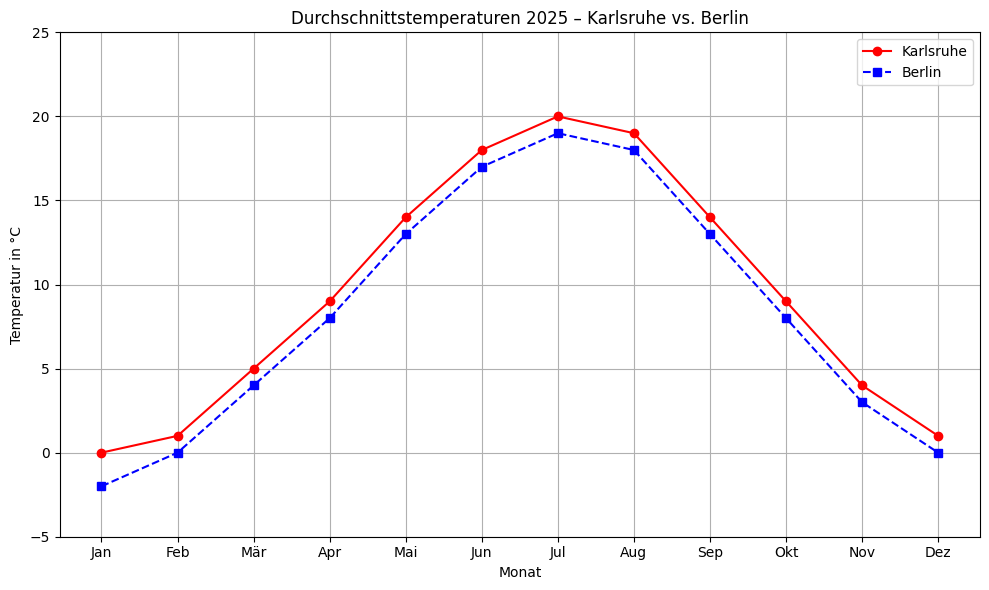

In [3]:
import matplotlib.pyplot as plt

# Daten
monate = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
T_ka = [0, 1, 5, 9, 14, 18, 20, 19, 14, 9, 4, 1]
T_berlin = [-2, 0, 4, 8, 13, 17, 19, 18, 13, 8, 3, 0]

# Plot erstellen
plt.figure(figsize=(10, 6))

plt.plot(monate, T_ka,     marker='o', color='red',   label='Karlsruhe')
plt.plot(monate, T_berlin, marker='s', color='blue',  label='Berlin', linestyle='--')

# Beschriftungen & Co
plt.title('Durchschnittstemperaturen 2025 – Karlsruhe vs. Berlin')
plt.xlabel('Monat')
plt.ylabel('Temperatur in °C')
plt.legend()
plt.grid(True)

# Damits schöner aussieht
plt.ylim(-5, 25)
plt.tight_layout()
plt.show()